In [ ]:
# _*_ 原始代码 _*_ #
'''
# Get quotes from Yahoo finance
quotes = quotes_historical_yahoo_ochl("INTC", 
        datetime.date(1994, 4, 5), datetime.date(2015, 7, 3))

# Extract the required values
dates = np.array([quote[0] for quote in quotes], dtype=np.int)
closing_values = np.array([quote[2] for quote in quotes])
volume_of_shares = np.array([quote[5] for quote in quotes])[1:]

# Take diff of closing values and computing rate of change
diff_percentage = 100.0 * np.diff(closing_values) / closing_values[:-1]
dates = dates[1:]

# Stack the percentage diff and volume values column-wise for training
X = np.column_stack([diff_percentage, volume_of_shares])

# Create and train Gaussian HMM 
print "\nTraining HMM...."
model = GaussianHMM(n_components=5, covariance_type="diag", n_iter=1000)
model.fit(X)

# Generate data using model
num_samples = 500 
samples, _ = model.sample(num_samples) 
plt.plot(np.arange(num_samples), samples[:,0], c='black')

plt.show()
'''


Training HMM....


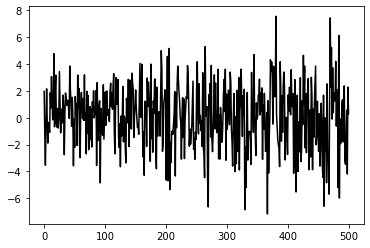

In [56]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

'''
try:
    from matplotlib.finance import quotes_historical_yahoo_ochl
except ImportError:
    from matplotlib.finance import quotes_historical_yahoo as quotes_historical_yahoo_ochl

# Get quotes from Yahoo finance
quotes = quotes_historical_yahoo_ochl("INTC", 
        datetime.date(1994, 4, 5), datetime.date(2015, 7, 3))
'''
# Extract the required values
quotes = []
with open('yahoofinance-INTC-19950101-20040412.csv','r') as f:
    for line in f.readlines():
        quotes.append([x for x in line[:-1].split(',')])
        
dates = np.array([quote[0] for quote in quotes])
closing_values = np.array([quote[2] for quote in quotes]).astype(float)
volume_of_shares = np.array([quote[5] for quote in quotes]).astype(float)[1:]

# Take diff of closing values and computing rate of change
diff_percentage = 100.0 * np.diff(closing_values) / closing_values[:-1]

# Stack the percentage diff and volume values column-wise for training
X = np.column_stack([diff_percentage, volume_of_shares])

# Create and train Gaussian HMM 
print("\nTraining HMM....")
model = GaussianHMM(n_components=5, covariance_type="diag", n_iter=1000)
model.fit(X)

# Generate data using model
num_samples = 500 
samples, _ = model.sample(num_samples) 
plt.plot(np.arange(num_samples), samples[:,0], c='black')

plt.show()


In [55]:
# _*_ DEBUG _*_ #
quotes = []
with open('yahoofinance-INTC-19950101-20040412.csv','r') as f:
    for line in f.readlines():
        quotes.append([x for x in line[:-1].split(',')])
        
dates = np.array([quote[0] for quote in quotes])
closing_values = np.array([quote[2] for quote in quotes]).astype(float)
volume_of_shares = np.array([quote[5] for quote in quotes]).astype(float)

print(dates[:4])
print(closing_values[:4])
print(volume_of_shares[:4])
print(len(closing_values),len(volume_of_shares))
print(len(np.diff(closing_values)))

['1995-01-03' '1995-01-04' '1995-01-05' '1995-01-06']
[4.000975 4.023438 4.0625   4.070313]
[2.669861 2.664625 2.685566 2.722212]
2335 2335
2334


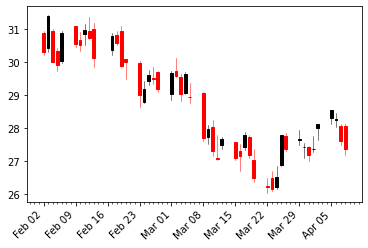

In [67]:
# from mpl-finance
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

from mpl_finance import candlestick_ohlc

date1 = '2004-2-1'
date2 = '2004-4-12'

mondays =  WeekdayLocator(MONDAY) # mojor ticks on the mondays
alldays = DayLocator()            # minor ticks on the days
weekFormatter = DateFormatter('%b %d') # e.g. Jan 12
dayFormatter = DateFormatter('%d')     # e.g. 12

quotes = pd.read_csv('yahoofinance-INTC-19950101-20040412.csv', index_col=0, parse_dates=True,
                    infer_datetime_format=True)

# select desired range of dates
quotes = quotes[(quotes.index >= date1) & (quotes.index <= date2)]

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
#ax.xaxis.set_min_formatter(dayFormatter)

#plot_day_summary(ax, quotes, ticksize=3)
candlestick_ohlc(ax, zip(mdates.date2num(quotes.index.to_pydatetime()),
                        quotes['Open'],quotes['High'],quotes['Low'],quotes['Close']),
                width=0.6)
ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()